# Plotting Loads for Beams Using Matplotlib


We are going to define a simple beam with an artificial material (not relevant for the calculation of the Fourier coefficients of the loads) and calculate the Fourier representations of some loads using different numbers of harmonic terms.

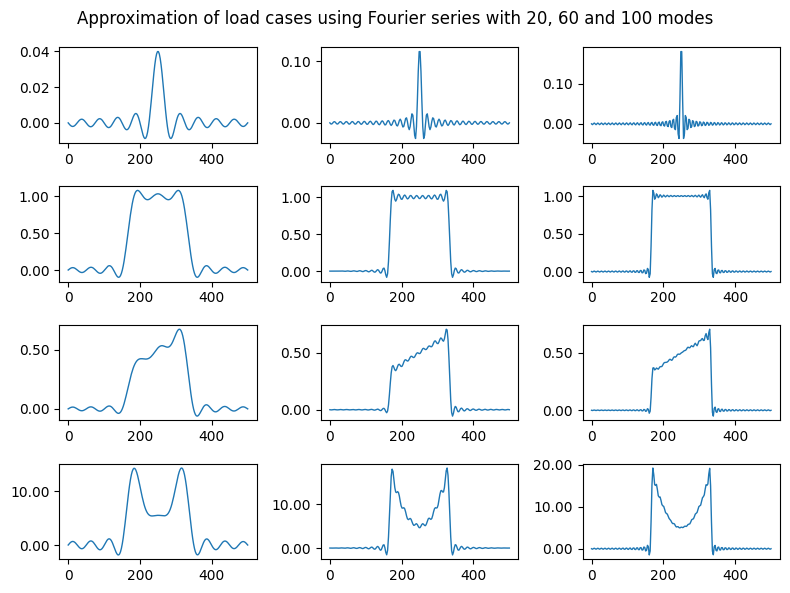

In [120]:
import numpy as np
import matplotlib.pyplot as plt

from sigmaepsilon.solid.fourier import (
    NavierBeam,
    PointLoad,
    LineLoad,
)

from sigmaepsilon.solid.fourier.config import config

# setting up parameters for Monte-Carlo integration
config["NUM_MC_SAMPLES_BEAM"] = 200000
config["MC_BATCH_SIZE_BEAM"] = 5000

# ---------------------------------------- domain ---------------------------------------- #

# setting up the beam
beam = NavierBeam(
    500,  # length
    1,  # number of harmonics, we are going to set this later
    EI=1,  # bending stiffness
)

# --------------------------------------- plotting --------------------------------------- #

plt.ioff()
fig, axs = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(8, 6)  # Set width to 8 inches and height to 6 inches
number_of_modes = [20, 60, 100]

# helper function for plotting load cases
def plot_load_case(load_case, ax=None):
    if ax is None:
        _, ax = plt.subplots()

    points = np.linspace(0, beam.size, 200)
    values = load_case.eval_approx(beam, points)[0, :, 0]
    ax.plot(points, values, linewidth=1)
    ax.yaxis.set_major_formatter("{x:.02f}")

# first load case
load_case = PointLoad(beam.size / 2, [1, 0])
for i in range(len(number_of_modes)):
    beam.shape = number_of_modes[i]
    plot_load_case(load_case, axs[0, i])

# second load case
load_case = LineLoad((beam.size / 3, 2 * beam.size / 3), (1, 0))
for i in range(len(number_of_modes)):
    beam.shape = number_of_modes[i]
    plot_load_case(load_case, axs[1, i])

# third load case
load_case = LineLoad((beam.size / 3, 2 * beam.size / 3), (f"x/{beam.size}", 0))
for i in range(len(number_of_modes)):
    beam.shape = number_of_modes[i]
    plot_load_case(load_case, axs[2, i])

# fourth load case
load_case = LineLoad((beam.size / 3, 2 * beam.size / 3), ("((x-250)**2)/500 + 5", 0))
for i in range(len(number_of_modes)):
    beam.shape = number_of_modes[i]
    plot_load_case(load_case, axs[3, i])

# setting up figure and showing it
fig.suptitle(
    "Approximation of load cases using Fourier series with 20, 60 and 100 modes"
)
fig.tight_layout()
plt.show()